In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
#Import from openFF
df_O_PROD = pd.read_csv('O_OPENFF/output_data/O_data_EAN13.csv')

df_O_PROD['O_EAN13'] = df_O_PROD['O_EAN13'].astype(str) + '.0'
df_O_PROD['O_COUNT'] = 1

In [16]:
#Import from NIELSEN
df_N_ALL = pd.read_csv('N_NIELSEN/output_data/N_ALL_DATA.csv')

KPI = 'Ventes Volume  '
MKT_SEGMENT = 'HMSM + PROXI + DRIVE + SDMP' # France

KPI_AND_MKT_SEGMENT = (df_N_ALL['KPI'] == KPI) & (df_N_ALL['MKT_SEGMENT'] == MKT_SEGMENT)

df_N_SEL = df_N_ALL[KPI_AND_MKT_SEGMENT] 

new_cols = ['EAN13', 'MARQUE', 'RECETTES', 'ORGANIC', 'WEIGHT_num', 'EMBALLAGE', 'GAMME',
    'FORMAT', 'COMPTE', 'STD/PROMO', 'ITEM', 'DERNIER CAM', 'CAM AN-1', 'NIELSEN_DESC_SHORT',
    'NIELSEN_DESCRIPTION', 'INITIAL_INDEX']

df_N_prod = df_N_SEL.loc[:, new_cols]
#df_F_prod['EAN13'] = df_F_prod['EAN13'].astype(str)

#SAME_PRODUCT = MARQUE, EMBALLAGE, GAMME, RECETTES, ORGANIC
#df_N_prod['SAME_PRODUCT'] = df_N_prod['MARQUE'] + ', ' + df_N_prod['EMBALLAGE'] + ', ' + df_N_prod['GAMME'] + ', '  + df_N_prod['RECETTES'] + ', '  + df_N_prod['ORGANIC'].astype(str)# + ', '  + df_N_prod['WEIGHT'].astype(str)
df_N_prod['N_COUNT'] = 1

In [17]:
df_N_prod.shape

(1432, 19)

In [18]:
df_N_prod['SAME_PRODUCT'][0]

'AUT MQ, AUT EMB, SCE CLAS, CITRON VERT PIMENT DOUX, 0'

In [19]:
df_prod_summary = df_N_prod[['SAME_PRODUCT', 'N_COUNT', 'DERNIER CAM', 'CAM AN-1']].groupby(['SAME_PRODUCT']).sum()

In [20]:
df_prod_summary.shape

(824, 3)

In [21]:
df_prod_summary.describe()

,N_COUNT,DERNIER CAM,CAM AN-1
count,824.000000,8.240000e+02,8.240000e+02
mean,1.737864,6.070880e+04,6.184241e+04
std,3.143274,3.336885e+05,3.939293e+05
min,1.000000,0.000000e+00,0.000000e+00
25%,1.000000,1.497500e+01,1.015000e+01
50%,1.000000,7.530000e+02,7.135500e+02
75%,1.000000,7.836700e+03,7.118725e+03
max,47.000000,4.883582e+06,8.350598e+06


In [22]:
df_prod_summary.tail(20)

,N_COUNT,DERNIER CAM,CAM AN-1
SAME_PRODUCT,,,
"ZAPETTI BUITONI, POT, LEGUMES, BASILIC, -1",2,0.0,0.0
"ZAPETTI BUITONI, POT, LEGUMES, BASILIC, 0",2,0.0,0.8
"ZAPETTI BUITONI, POT, LEGUMES, CALIENTE ARRABBIATA & PIMENT &, 0",1,2.0,195.0
"ZAPETTI BUITONI, POT, LEGUMES, CHAMPIGNONS & MASCARPONE, 0",2,0.0,193.0
"ZAPETTI BUITONI, POT, LEGUMES, CURRY A LA CORIANDRE, 0",1,0.0,3.1
"ZAPETTI BUITONI, POT, LEGUMES, FROMAGE, 0",2,6.7,522.8
"ZAPETTI BUITONI, POT, LEGUMES, GRECQUE COMPOTEE D'AUBERGINES, 0",1,1.2,181.2
"ZAPETTI BUITONI, POT, LEGUMES, HERB PROV, 0",1,0.0,0.0
"ZAPETTI BUITONI, POT, LEGUMES, NAPOLITAIN, -1",2,4.6,570.2


[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'number of formats')]

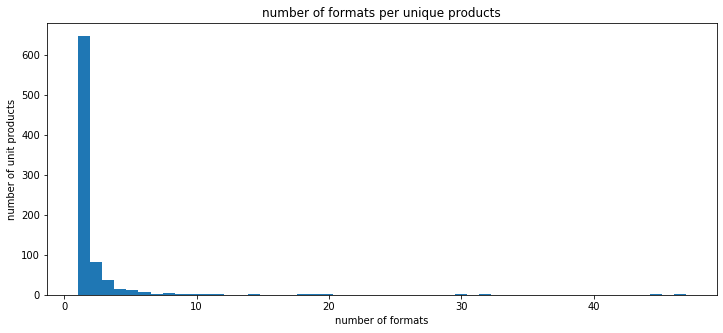

In [23]:
df_prod_summary['N_COUNT'].plot.hist(bins=50, title='number of formats per unique products', figsize=(12,5)).set(xlabel='number of formats', ylabel='number of unit products')

[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'number of formats')]

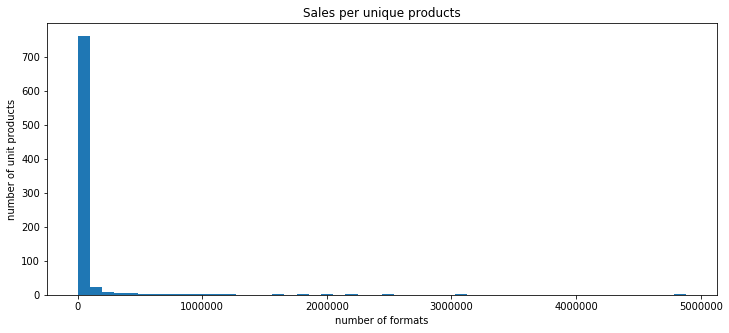

In [24]:
df_prod_summary['DERNIER CAM'].plot.hist(bins=50, title='Sales per unique products', figsize=(12,5)).set(xlabel='number of formats', ylabel='number of unit products')

[Text(0, 0.5, 'number of unit products'),
 Text(0.5, 0, 'number of formats (EAN13)')]

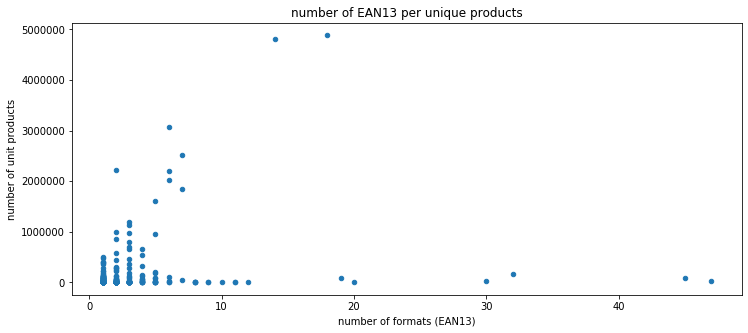

In [25]:
df_prod_summary.plot.scatter(x='N_COUNT', y='DERNIER CAM', title='number of EAN13 per unique products', figsize=(12,5)).set(xlabel='number of formats (EAN13)', ylabel='number of unit products')

In [26]:
df_prod_summary[df_prod_summary['N_COUNT'] > 10]

,N_COUNT,DERNIER CAM,CAM AN-1
SAME_PRODUCT,,,
"AUT MQ, POT, BIO, BASILIC, 1",12,10217.7,3288.5
"AUT MQ, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",32,168415.0,99866.9
"AUT MQ, POT, LEGUMES, ARRABIATA, 0",30,31511.6,30837.3
"AUT MQ, POT, LEGUMES, BASILIC, 0",45,87811.2,84480.8
"AUT MQ, POT, LEGUMES, NAPOLITAIN, 0",11,6762.0,6920.5
"AUT MQ, POT, LEGUMES, NATURE, 0",19,95229.0,95189.4
"AUT MQ, POT, LEGUMES, OLIVE, 0",11,14668.4,13612.7
"AUT MQ, POT, PESTO, PESTO RGE, 0",20,10183.1,13165.5
"AUT MQ, POT, PESTO, PESTO VERD, 0",47,21023.8,24861.9


**Estimation des EAN Manquants**

In [28]:
df_F_prod[df_F_prod['SAME_PRODUCT'] == 'PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0']

,EAN13_num,MARQUE,RECETTES,ORGANIC,WEIGHT_num,EMBALLAGE,GAMME,FORMAT,COMPTE,STD/PROMO,ITEM,CAM AN-1,DERNIER CAM,EAN13,WEIGHT,NIELSEN_DESCRIPTION,INITIAL_INDEX,SAME_PRODUCT,N_COUNT
1101,3038354192208,PANZANI,BOLOGNAISE,0,600,POT,BOLO CLASSIQUE,GF,1CT,STD,3038354192208,0.0,0.0,3038354192208.0,600.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1190,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1
1102,3038359000850,PANZANI,BOLOGNAISE,0,600,POT,BOLO CLASSIQUE,GF,1CT,STD,3038359000850,129.0,2.0,3038359000850.0,600.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1191,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1
1103,3038359004575,PANZANI,BOLOGNAISE,0,600,POT,BOLO CLASSIQUE,GF,1CT,STD,3038359004575,2229658.7,8255.6,3038359004575.0,600.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1192,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1
1105,3038354190808,PANZANI,BOLOGNAISE,0,425,POT,BOLO CLASSIQUE,MF,1CT,STD,3038354190808,1.3,0.0,3038354190808.0,425.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1194,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1
1106,3038359000843,PANZANI,BOLOGNAISE,0,425,POT,BOLO CLASSIQUE,MF,1CT,STD,3038359000843,2462834.8,691063.4,3038359000843.0,425.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1195,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1
1107,3038359007651,PANZANI,BOLOGNAISE,0,425,POT,BOLO CLASSIQUE,MF,1CT,STD,3038359007651,125459.7,1749121.4,3038359007651.0,425.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1196,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1
1108,3038359008962,PANZANI,BOLOGNAISE,0,425,POT,BOLO CLASSIQUE,MF,1CT,STD,3038359008962,0.0,157481.4,3038359008962.0,425.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1197,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1
1109,3038354310800,PANZANI,BOLOGNAISE,0,500,POT,BOLO CLASSIQUE,MF,1CT,STD,3038354310800,0.0,0.0,3038354310800.0,500.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1198,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1
1110,3038359004155,PANZANI,BOLOGNAISE,0,500,POT,BOLO CLASSIQUE,MF,1CT,STD,3038359004155,1343951.9,1414524.0,3038359004155.0,500.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1199,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1
1113,3038352871327,PANZANI,BOLOGNAISE,0,425,POT,BOLO CLASSIQUE,MF,2CT,STD,3038352871327,145681.0,455.8,3038352871327.0,425.0,FECULENTS POT PANZANI SA PANZANI BOLO CLASSIQU...,1202,"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1


In [ ]:
#Merge of the two databases

In [31]:
df_M_PROD = df_O_PROD.merge(df_F_prod, left_on='O_EAN13', right_on='EAN13', how='inner')

In [32]:
df_M_PROD

,Unnamed: 0,O_EAN13,O_categories,O_ingredients,O_nutriments,O_product_name,O_manufacturing_places,O_category_properties,O_ingredients_text,O_product_name_fr,...,STD/PROMO,ITEM,CAM AN-1,DERNIER CAM,EAN13,WEIGHT,NIELSEN_DESCRIPTION,INITIAL_INDEX,SAME_PRODUCT,N_COUNT
0,0,3017239003969.0,"Epicerie, Sauces, Sauces aux légumes, Sauces a...","['Tomate', 'olive noire', ""huile d'olive"", 'câ...","{'energy-kcal_100g': 122, 'carbohydrates_value...",Sauce aux Olives Provençale,France,{},"Tomate (51%), olive noire (36%), huile d'olive...",Sauce aux Olives Provençale,...,STD,3017239003969,4740.1,7.6,3017239003969.0,190.0,FECULENTS POT AUT FAB AUT MQ LEGUMES PF OLIVES...,688,"AUT MQ, POT, LEGUMES, OLIVES PROVENCALE, 0",1
1,1,3017239003976.0,"Epicerie, Sauces, Sauces aux légumes, Sauces a...","['olive verte égouttée', 'huile de tournesol',...","{'nova-group_100g': 4, 'energy-kj_100g': 1086,...",Sauce aux olives façon pesto vert,NaN,{},"olive verte égouttée (33%), huile de tournesol...",Sauce aux olives façon pesto vert,...,STD,3017239003976,2781.7,12.9,3017239003976.0,180.0,FECULENTS POT AUT FAB AUT MQ PESTO PF OLIVES F...,763,"AUT MQ, POT, PESTO, OLIVES FACON PESTO VERT, 0",1
2,2,3017239003983.0,"Epicerie, Sauces, Sauces Pesto, Sauces Pesto R...","['Tomate', 'olive', 'huile de tournesol', 'pom...","{'nutrition-score-fr_serving': 7, 'saturated-f...",Sauce aux olives façon pesto rosso,France,"{'ciqual_food_name:fr': 'Sauce pesto rosso, pr...","Tomate 46%, olive 18% (dont olive verte égoutt...",Sauce aux olives façon pesto rosso,...,STD,3017239003983,2786.6,12.5,3017239003983.0,190.0,POT AUT FAB AUT MQ PESTO PF OLIVES FACON PESTO...,762,"AUT MQ, POT, PESTO, OLIVES FACON PESTO ROSSO, 0",1
3,3,3017239003990.0,NaN,[],"{'saturated-fat': 1, 'sodium_unit': 'g', 'satu...",Sauce aux Olives Citron Confit,NaN,{},NaN,NaN,...,STD,3017239003990,3895.9,11.5,3017239003990.0,190.0,POT AUT FAB AUT MQ LEGUMES PF CITRON CONFIT & ...,654,"AUT MQ, POT, LEGUMES, CITRON CONFIT & OLIVES, 0",1
4,4,3017239004003.0,"Epicerie, Sauces, Sauces tomate, Sauces tomate...","['Tomate', 'champignon', 'olive verte égouttée...","{'carbohydrates': 4.1, 'proteins_100g': 1.5, '...",Sauce aux olives champignons,France,"{'ciqual_food_name:en': 'Tomato sauce, w mushr...","Tomate (36 %), champignon (24 %), olive verte ...",Sauce aux olives champignons,...,STD,3017239004003,144.0,0.0,3017239004003.0,190.0,AUT SCE POT AUT FAB AUT MQ SCE CLAS PF CHAMPIG...,101,"AUT MQ, POT, SCE CLAS, CHAMPIGNONS & OLIVES, 0",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1095,9002859071409.0,"Epicerie, Sauces, Sauces Pesto, Sauces Pesto R...","['Tomates passées au tamis', 'huile végétale',...","{'sugars_unit': '', 'salt_unit': '', 'sugars_1...",Pesto Rosso,Italie,"{'ciqual_food_name:en': 'Sauce, pesto rosso, p...","Tomates passées au tamis 50 %, huile végétale,...",Pesto Rosso,...,STD,9002859071409,43.4,42.0,9002859071409.0,190.0,SAUCES POUR FECULENTS POT AUT FAB AUT MQ PESTO...,790,"AUT MQ, POT, PESTO, PESTO RGE, 0",1
1099,1096,9310432330028.0,"Epicerie,Sauces,Sauces Teriyaki","['Sauce _Soja_', 'Mirin', 'Sucre', 'Protéine D...","{'sodium_100g': 4.36, 'carbohydrates_unit': 'g...",Sauce Teriyaki Obento,NaN,"{'ciqual_food_name:fr': 'Sauce teriyaki, préem...","Sauce _Soja_ (Eau, _Soja_, _Blé_, Sel) Mirin (...",Sauce Teriyaki Obento,...,STD,9310432330028,68.9,26.3,9310432330028.0,250.0,AUT SCE POT AUT FAB AUT MQ SCE CLAS PF TERIYAK...,138,"AUT MQ, POT, SCE CLAS, TERIYAKI MARINADE, 0",1
1100,1097,9325763000083.0,NaN,NaN,"{'energy_100g': 310, 'energy-kcal': 74, 'energ...",Tikka Masala,NaN,{},NaN,Tikka Masala,...,STD,9325763000083,0.0,804.2,9325763000083.0,375.0,AUT SCE DOY PAC AUT FAB AUT MQ SCE CLAS MF TIK...,25,"AUT MQ, DOY PAC, SCE CLAS, TIKKA MASALA, 0",1
1101,1098,9556041130981.0,"Epicerie, Sauces","['EAU', 'SUCRE', 'PÂTE DE SOJA', 'AMIDON DE MA...","{'proteins_serving': 0.18, 'sodium': 0.72, 'sa...",Sauce Canard Laqué Ayam™,Malaisie,{},"EAU, SUCRE, PÂTE DE SOJ

In [35]:
df_M_PROD_SUM = df_M_PROD[['SUMMARY', 'N_COUNT', 'O_COUNT', 'DERNIER CAM', 'CAM AN-1']].groupby(['SUMMARY']).sum().sort_values(by='DERNIER CAM', ascending=False)

KeyError: "['SUMMARY'] not in index"

In [242]:
df_M_PROD_SUM

,N_COUNT,O_COUNT,DERNIER CAM,CAM AN-1
SUMMARY,,,,
"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",18,6.0,4883582.2,8350598.1
"PANZANI, POT, LEGUMES, PROVENCALE, 0",14,5.0,4805193.7,4537655.1
"PANZANI, TUB, LEGUMES, PT LEGUME, 0",6,4.0,3071093.9,3081322.4
"PANZANI, POT, LEGUMES, TOMATE CUI, 0",7,0.0,2515152.0,2414803.2
"HEINZ, BRIC, LEGUMES, AIL OIGNON, 0",2,2.0,2227781.6,1915900.0
...,...,...,...,...
"BARILLA, POT, PESTO, TOM SECHE, 0",1,0.0,0.0,0.0
"POLLI, POT, A CUISINER, RISOTTO TOMATES & BASILIC, 0",1,0.0,0.0,0.0
"BUITONI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1,0.0,0.0,0.0


In [246]:
temp = df_M_PROD_SUM[df_M_PROD_SUM['DERNIER CAM'] > 500000]

[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'sales')]

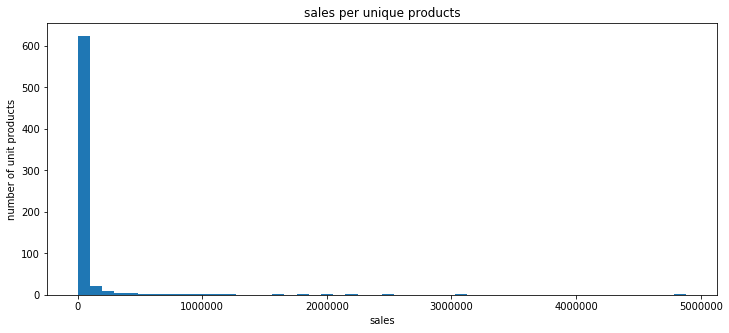

In [243]:
df_M_PROD_SUM['DERNIER CAM'].plot.hist(bins=50, title='sales per unique products', figsize=(12,5)).set(xlabel='sales', ylabel='number of unique products')

In [247]:
temp.shape

(22, 4)

In [253]:
temp.to_excel('sales_500000.xls')

In [248]:
df = pd.read_csv('O_OPENFF/O_produits_EAN13.csv')

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 39 columns):
Unnamed: 0                                               1100 non-null int64
_id                                                      1100 non-null int64
categories                                               665 non-null object
ingredients                                              976 non-null object
nutriments                                               1100 non-null object
product_name                                             1090 non-null object
manufacturing_places                                     213 non-null object
category_properties                                      1096 non-null object
ingredients_text                                         646 non-null object
product_name_fr                                          1063 non-null object
interface_version_modified                               1098 non-null object
ingredients_n                            

In [251]:
3038352874908 in df['_id']

False